# 4) Data Cleansing + Analysis & Validation
- Beurteilung der Datenqualität und erforderliche Bereinigung der Daten
- Analyse der Verteilungen, Abweichungen & Kennzahlen

## 4.1 Importieren der Bibliotheken & drive mount

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the folder paths
main_folder_path = '/content/drive/MyDrive/wine_project'
processed_data_folder_path = os.path.join(main_folder_path, 'processed_data')
plots_folder_path = os.path.join(main_folder_path, 'plots')
analysis_plots_folder_path = os.path.join(plots_folder_path,'analysis')

Mounted at /content/drive


## 4.1 Laden des Datensatzes

In [2]:
# Pfad zur gespeicherten Datei im 'processed_data' Ordner
file_path = os.path.join(processed_data_folder_path, 'wine_quality_processed.csv')

# Prüfen, ob die Datei existiert
if os.path.exists(file_path):
    print("File found! Loading...")
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print(f"Shape of the dataset: {data.shape}")
    display(data.head())
else:
    print(f"File not found at: {file_path}")


File found! Loading...
Dataset loaded successfully.
Shape of the dataset: (6497, 14)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Okay
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Okay
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Okay
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Okay
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Okay


## 4.2 Analyse fehlender Werte

In [3]:
# Analyse der fehlenden Werte
print("\n--- Analyse fehlender Werte ---")
missing_values = data.isnull().sum()
missing_summary = missing_values[missing_values > 0]
if missing_summary.empty:
    print("Es wurden keine fehlenden Werte gefunden.")
else:
    print(missing_summary.to_string(index=True))

    print("\n--- Positionen der fehlenden Werte ---")
    # Liste von Zeilen- und Spaltenindizes der fehlenden Werte
    missing_positions = data.isnull().stack().reset_index()
    missing_positions.columns = ['Zeile', 'Spalte', 'Fehlt']
    missing_positions = missing_positions[missing_positions['Fehlt'] == True].drop(columns=['Fehlt'])

    # tabellarische Ausgabe
    print(missing_positions.to_string(index=False))


--- Analyse fehlender Werte ---
Es wurden keine fehlenden Werte gefunden.


## 4. 3 Prüfung auf Ausreisser

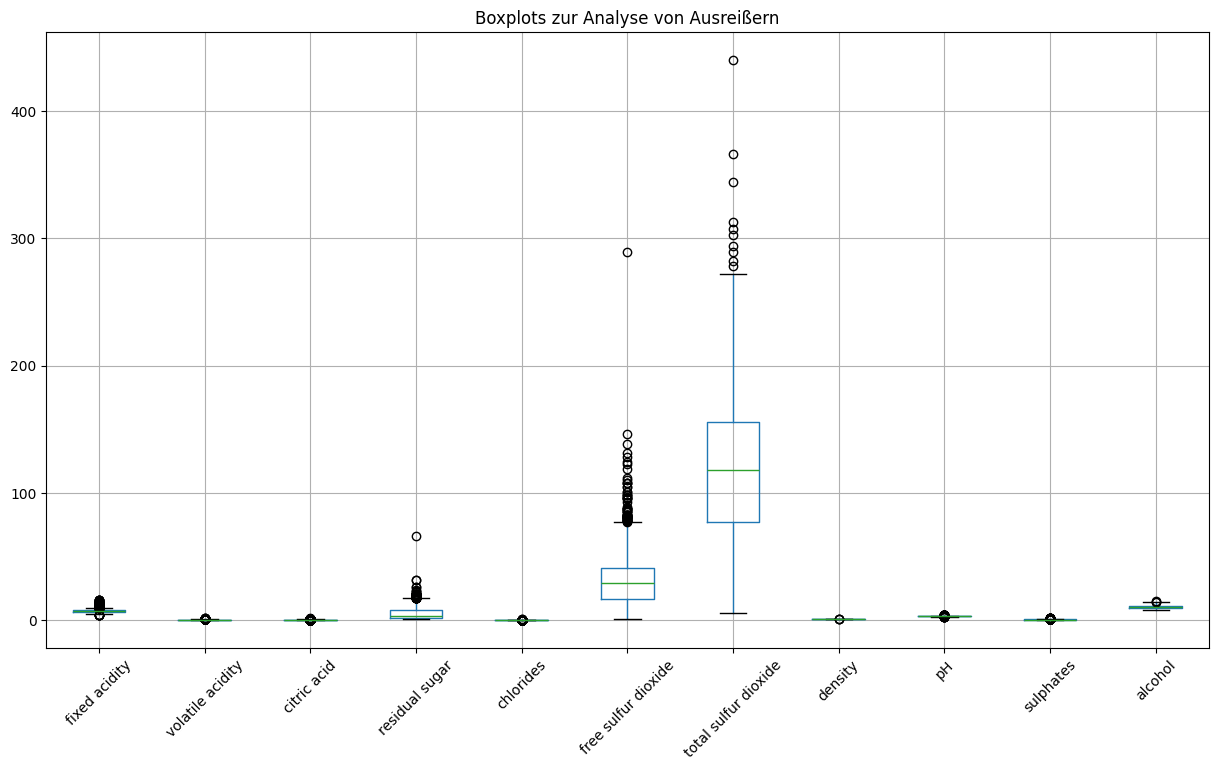

In [4]:
# Boxplot für numerische Merkmale mit Speicheroption
def plot_boxplot_with_save(data, columns, save_path=None):
    try:
        plt.figure(figsize=(15, 8))
        data.boxplot(column=columns)
        plt.xticks(rotation=45)
        plt.title("Boxplots zur Analyse von Ausreißern")

        # Optional speichern
        if save_path:
            plt.savefig(save_path, bbox_inches='tight')

        plt.show()
    except Exception as e:
        print(f"Fehler beim Erstellen des Boxplots: {e}")

# Beispielaufruf zum Speichern des Boxplots
boxplot_save_path = os.path.join(analysis_plots_folder_path, 'boxplots_outlier_analysis.png')

plot_boxplot_with_save(
    data,
    columns=['fixed acidity', 'volatile acidity', 'citric acid',
             'residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
    save_path=boxplot_save_path
)

## 4.3 Datenverteilung visualisieren

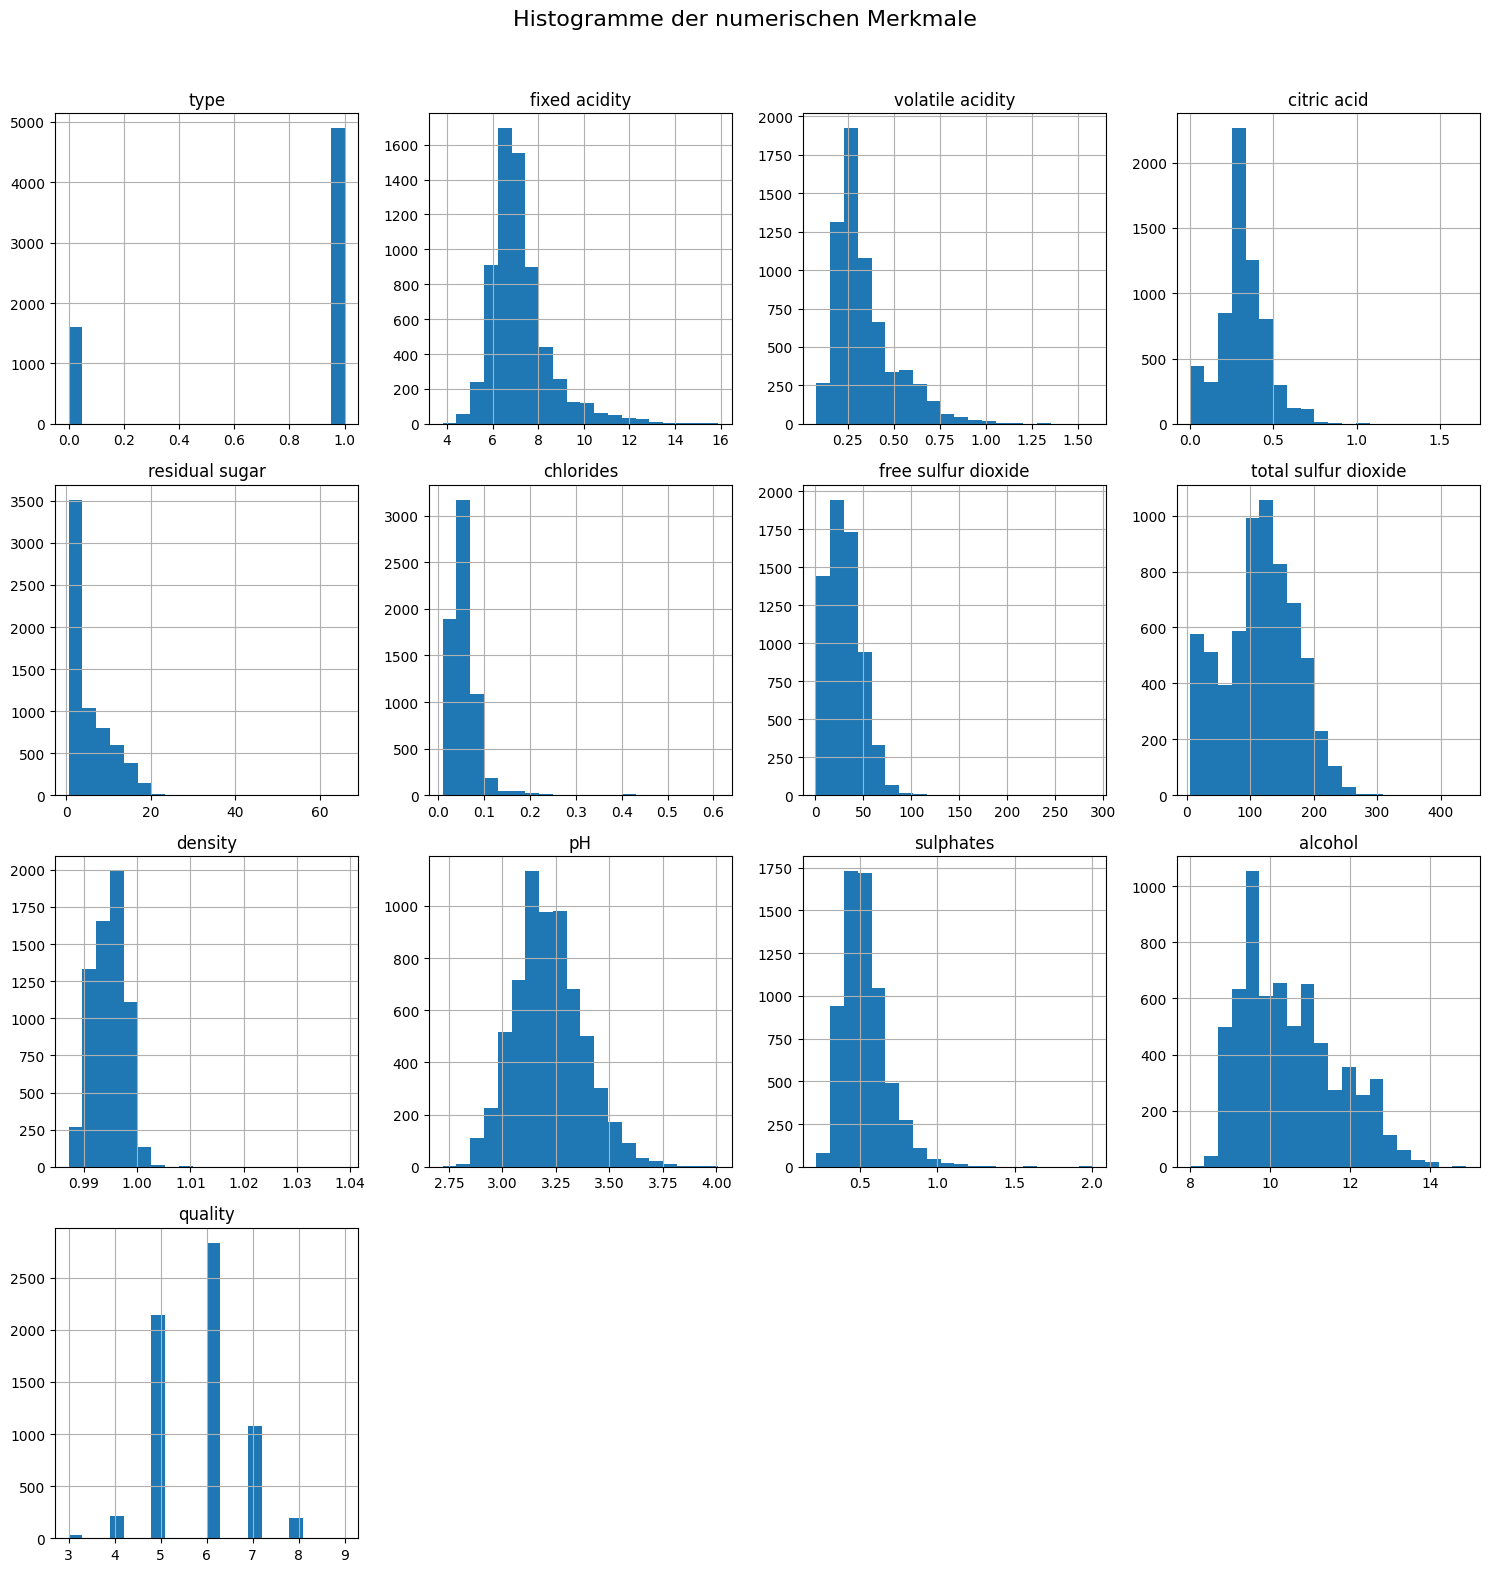

In [5]:
# Anzahl der numerischen Spalten
num_cols = len(data.select_dtypes(include='number').columns)

# Dynamisches Layout basierend auf der Anzahl der numerischen Spalten
rows = (num_cols // 4) + (1 if num_cols % 4 != 0 else 0)  # 4 Plots pro Zeile

# Histogramme für alle numerischen Spalten
data.hist(bins=20, figsize=(15, rows * 4), layout=(rows, 4))
plt.suptitle("Histogramme der numerischen Merkmale", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Überschneidung mit Titel vermeiden
plt.show()

## 4.4 Statistische Kennzahlen

In [6]:
# Statistische Kennzahlen für numerische Spalten
print("\n--- Statistische Kennzahlen ---")
print(data.describe())


--- Statistische Kennzahlen ---
              type  fixed acidity  volatile acidity  citric acid  \
count  6497.000000    6497.000000       6497.000000  6497.000000   
mean      0.753886       7.215307          0.339666     0.318633   
std       0.430779       1.296434          0.164636     0.145318   
min       0.000000       3.800000          0.080000     0.000000   
25%       1.000000       6.400000          0.230000     0.250000   
50%       1.000000       7.000000          0.290000     0.310000   
75%       1.000000       7.700000          0.400000     0.390000   
max       1.000000      15.900000          1.580000     1.660000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     6497.000000  6497.000000          6497.000000           6497.000000   
mean         5.443235     0.056034            30.525319            115.744574   
std          4.757804     0.035034            17.749400             56.521855   
min          0.600000     0.00

In [7]:
# Häufigkeiten der Kategorien
print("\n--- Häufigkeiten der Qualitätskategorien ---")

# Definierte Kategorien
categories = ['Sehr schlecht', 'Schlecht', 'Okay', 'Gut', 'Sehr gut']

# Häufigkeiten anzeigen
category_counts = data['quality_category'].value_counts().reindex(categories, fill_value=0)
print(category_counts)



--- Häufigkeiten der Qualitätskategorien ---
quality_category
Sehr schlecht       0
Schlecht          246
Okay             4974
Gut              1272
Sehr gut            5
Name: count, dtype: int64


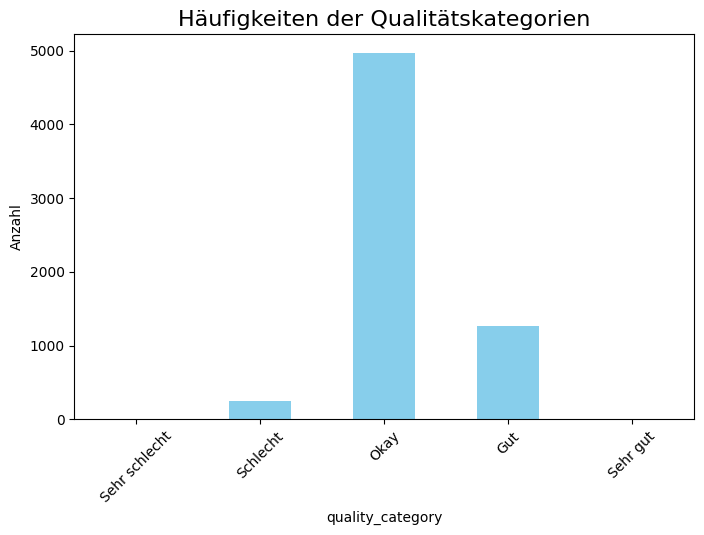

In [8]:
# Balkendiagramm der Qualitätskategorien mit Speicheroption
def plot_quality_categories_with_save(data, save_path=None):
    try:
        # Definition der Kategorien
        categories = ['Sehr schlecht', 'Schlecht', 'Okay', 'Gut', 'Sehr gut']

        # Berechnung der Häufigkeiten der Kategorien
        category_counts = data['quality_category'].value_counts().reindex(categories, fill_value=0)

        # Balkendiagramm erstellen
        category_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))
        plt.title("Häufigkeiten der Qualitätskategorien", fontsize=16)
        plt.ylabel("Anzahl")
        plt.xticks(rotation=45)

        # Optional speichern
        if save_path:
            plt.savefig(save_path, bbox_inches='tight')

        plt.show()
    except Exception as e:
        print(f"Fehler beim Erstellen des Balkendiagramms: {e}")

# Beispielaufruf zum Speichern des Balkendiagramms
bar_chart_save_path = os.path.join(analysis_plots_folder_path, 'quality_categories_bar_chart.png')

plot_quality_categories_with_save(data, save_path=bar_chart_save_path)


## 4.6 Erweiterte Verteilungsanalyse

<ipython-input-9-012ce12dbbca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_category', y='alcohol', data=data, palette='coolwarm', order=categories)


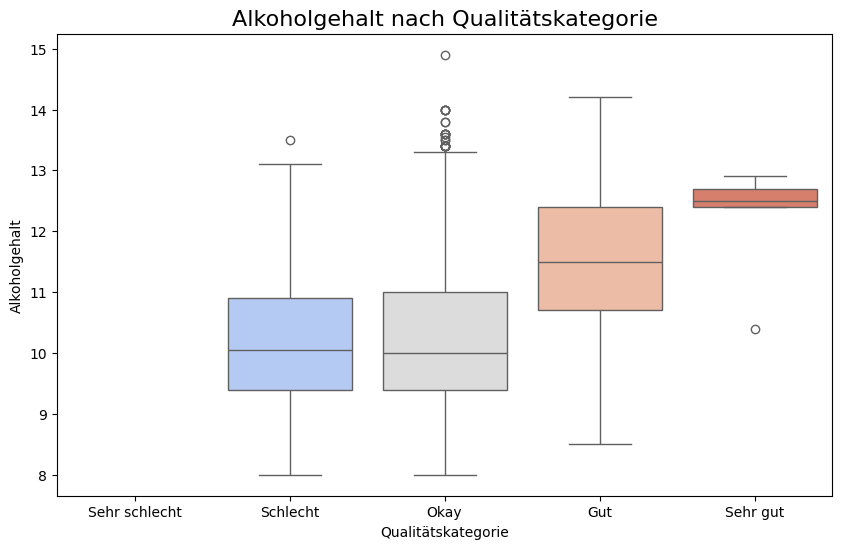

In [9]:
# Boxplot: Qualität vs. Alkohol mit Speicheroption
def plot_alcohol_vs_quality_with_save(data, save_path=None):
    try:
        # Definition der Kategorien in der gewünschten Reihenfolge
        categories = ['Sehr schlecht', 'Schlecht', 'Okay', 'Gut', 'Sehr gut']

        # Boxplot erstellen
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='quality_category', y='alcohol', data=data, palette='coolwarm', order=categories)
        plt.title("Alkoholgehalt nach Qualitätskategorie", fontsize=16)
        plt.ylabel("Alkoholgehalt")
        plt.xlabel("Qualitätskategorie")

        # Optional speichern
        if save_path:
            plt.savefig(save_path, bbox_inches='tight')

        plt.show()
    except Exception as e:
        print(f"Fehler beim Erstellen des Boxplots: {e}")

# Beispielaufruf zum Speichern des Boxplots
boxplot_save_path = os.path.join(analysis_plots_folder_path, 'alcohol_vs_quality_boxplot.png')

plot_alcohol_vs_quality_with_save(data, save_path=boxplot_save_path)


## 4.7 Fazit

### 1) Qualitätskategorie Sehr schlecht:
- Es gibt keine Datenpunkte in dieser Kategorie, was durch das Fehlen einer Box oder Whisker angezeigt wird. Das deutet darauf hin, dass keine Weine in die Kategorie "Sehr schlecht" eingestuft wurden.

### 2) Qualitätskategorie Schlecht:
- Die Verteilung ist recht eng mit einem Median um etwa 10 Vol.-% Alkohol.
- Es gibt wenige Ausreißer mit einem höheren Alkoholgehalt (oberhalb von 12 Vol.-%).

### 3) Qualitätskategorie Okay:
- Diese Kategorie zeigt eine breite Verteilung, mit einem Median knapp über 10 Vol.-% Alkohol.
- Es gibt mehrere Ausreißer mit einem höheren Alkoholgehalt (zwischen 12 und 14 Vol.-%).

### 4) Qualitätskategorie Gut:
- Die Verteilung ist etwas schmaler als bei der Kategorie Okay, und der Median liegt höher (etwa bei 11 Vol.-% Alkohol).
- Kaum Ausreißer sind zu erkennen.

### 5) Qualitätskategorie Sehr gut:
- Diese Kategorie weist eine relativ kleine Stichprobe auf, aber der Alkoholgehalt ist im Allgemeinen höher (zwischen 12 und 13,5 Vol.-% Alkohol), mit einer engen Verteilung und kaum Ausreißern.

### 6) Interpretation:
- Es gibt einen sichtbaren Trend: Höhere Qualitätskategorien korrelieren mit einem höheren Alkoholgehalt.
- Die Kategorie Okay hat die breiteste Verteilung, was darauf hindeuten könnte, dass hier Weine mit unterschiedlichsten Charakteristiken eingeordnet werden.
- Die Kategorien Gut und Sehr gut zeigen eine klarere Verteilung, was auf konsistentere Charakteristiken in diesen Weinen hinweist.

## 4.8 Next Steps:
- Feature Selection & Engineering: Analyse der Korrelationen und Kausalitäten, Identifikation der Features (erklärende Variablen),
ggf. Optimierung der Datengrundlage